# Investigating the Economic Cost Per Event and Per Athlete of the Olympics
## By Juliette Oliver

In order to answer our research question, "What are the widespread social and economic impacts of the Olympic games", I am going to be looking at the economic cost of the Summer and Winter Olympic games since 1964. Specifically, I will be evaluating the per event cost and the per athlete cost of individual games in order to see the overall trend in the price of hosting olympics, which could lead us to understand then the reuslting effects this may have on future Olympic games.


### Uploading and cleaning the data
Action: Firstly, I am going to import the necissary packages
Result: This will allow me to do specific funtctions and commands that will help me analyze my data.

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import contextily as ctx

In [4]:
import matplotlib.pyplot as plt

Action: I am going to import my CSV file intot he Jupyter Notebook
Result: I will now have a database that I can work with.

In [5]:
df = pd.read_csv('Cost_event_athlete.csv')

Action: I am using the .info button to show me a rough outline of my data
Result: I will be able to see general information, such ad Dtype of data and Column names that I can use to go forward in my exploration.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Games                       25 non-null     object 
 1   Year                        25 non-null     int64  
 2   Country                     25 non-null     object 
 3   Type                        25 non-null     object 
 4   Cost per event, mio. USD    25 non-null     float64
 5   Cost per athlete, mio. USD  25 non-null     float64
 6   event,                      0 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


Action:Inputting Df.head 
Result: Will allow me to see the first 20 rows of my data

In [7]:
df.head(20)

,Games,Year,Country,Type,"Cost per event, mio. USD","Cost per athlete, mio. USD","event,"
0,Tokyo,1964,Japan,Summer,1.7,0.10,NaN
1,Munich,1972,Germany,Summer,5.2,0.10,NaN
2,Montreal,1976,Canada,Summer,30.8,1.00,NaN
3,Moscow,1980,Soviet Union,Summer,31.2,1.20,NaN
4,Los Angeles,1984,United States,Summer,3.3,0.10,NaN
5,Barcelona,1992,Spain,Summer,37.7,1.00,NaN
6,Atlanta,1996,United States,Summer,15.3,0.40,NaN
7,Sydney,2000,Australia,Summer,16.8,0.50,NaN
8,Athens,2004,Greece,Summer,9.8,0.30,NaN
9,Beijing,2008,China,Summer,22.5,0.60,NaN


Action: Dropping all rows with complete "NAs"
Result: This will help me clean up my data and avoid rows with no data at all

In [8]:
df = df.dropna(axis=0,how="all")

Action: Upon second inspection, I see that the :"event," column is completely NA, so I will drop it now sonce it is not of any use.
Result: This will help me clean my data.

In [9]:
df.head(5)

,Games,Year,Country,Type,"Cost per event, mio. USD","Cost per athlete, mio. USD","event,"
0,Tokyo,1964,Japan,Summer,1.7,0.1,NaN
1,Munich,1972,Germany,Summer,5.2,0.1,NaN
2,Montreal,1976,Canada,Summer,30.8,1.0,NaN
3,Moscow,1980,Soviet Union,Summer,31.2,1.2,NaN
4,Los Angeles,1984,United States,Summer,3.3,0.1,NaN


In [10]:
columns_to_drop = ['event,']

Action: Renaming df to include the dropped column
Result: I can now work with my data devoid of the NA column

In [11]:
df = df.drop(columns_to_drop,axis=1)
df.head()

,Games,Year,Country,Type,"Cost per event, mio. USD","Cost per athlete, mio. USD"
0,Tokyo,1964,Japan,Summer,1.7,0.1
1,Munich,1972,Germany,Summer,5.2,0.1
2,Montreal,1976,Canada,Summer,30.8,1.0
3,Moscow,1980,Soviet Union,Summer,31.2,1.2
4,Los Angeles,1984,United States,Summer,3.3,0.1


Action: Replacing "Societ Union" with "Russia" since the USSR has dissolved
Result: This will allow me to later recieve a 3 letter alpha country code that I can use to map the countries later. Also- because the games in the Soviet Union were in Moscow, or present day Russia, I decided to change it for organizational purposes.

In [12]:
df.replace('Soviet Union', 'Russia')

,Games,Year,Country,Type,"Cost per event, mio. USD","Cost per athlete, mio. USD"
0,Tokyo,1964,Japan,Summer,1.7,0.10
1,Munich,1972,Germany,Summer,5.2,0.10
2,Montreal,1976,Canada,Summer,30.8,1.00
3,Moscow,1980,Russia,Summer,31.2,1.20
4,Los Angeles,1984,United States,Summer,3.3,0.10
5,Barcelona,1992,Spain,Summer,37.7,1.00
6,Atlanta,1996,United States,Summer,15.3,0.40
7,Sydney,2000,Australia,Summer,16.8,0.50
8,Athens,2004,Greece,Summer,9.8,0.30
9,Beijing,2008,China,Summer,22.5,0.60


Action: Bringing up the names of all the titles of columns in the dataset
Result: I can clearly see the name of the column I want to use and it will allow me to use the name to explore more of its variables.

In [13]:
df.columns.to_list()

['Games',
 'Year',
 'Country',
 'Type',
 'Cost per event, mio. USD',
 'Cost per athlete, mio. USD']

Action: Using the %matplotlib function in my data
Result: This will allow me to make rich visualizations for quick analysis of my data.

In [14]:
%matplotlib inline


### Plotting the Data
Action: Plotting the column "Cost Per event" for previous summer Olympics
Result: I will be able to investigate the temporal trends of cost per event at Summer Olympics

Text(0.5, 1.0, 'Cost per event Summer Olympics')

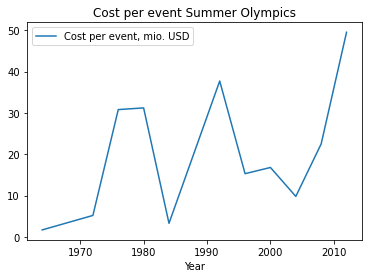

In [15]:
df.head(11).plot(x="Year", y="Cost per event, mio. USD")
plt.title('Cost per event Summer Olympics')

Action: Plotting the column "Cost Per event" for previous Winter Olympics
Result: I will be able to investigate the temporal trends of cost per event at Winter Olympics

Text(0.5, 1.0, 'Cost per event Winter Olympics')

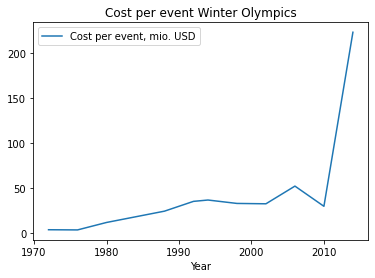

In [16]:
df.tail(11).plot(x="Year", y="Cost per event, mio. USD")
plt.title('Cost per event Winter Olympics')

Action: Plotting the column "Cost Per Athlete" for previous Summer Olympics
Result: I will be able to investigate the temporal trends of cost per athlete at Summer Olympics

Text(0.5, 1.0, 'Cost per Athlete Summer Olympics')

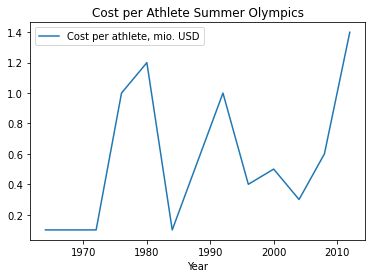

In [17]:
df.head(11).plot(x="Year", y="Cost per athlete, mio. USD")
plt.title('Cost per Athlete Summer Olympics')

Action: Plotting the column "Cost Per event" for previous Winter Olympics
Result: I will be able to investigate the temporal trends of cost per event at Winter Olympics

Text(0.5, 1.0, 'Cost per Athlete Winter Olympics')

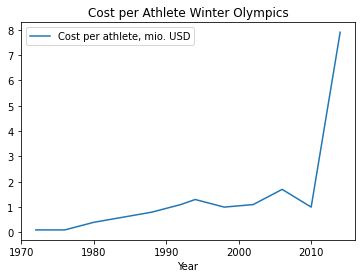

In [18]:
df.tail(11).plot(x="Year", y="Cost per athlete, mio. USD")
plt.title('Cost per Athlete Winter Olympics')

Action: Plotting the column "Cost Per event" and "Cost per Athlete" for previous Summer Olympics
Result: I will be able to compare the data side by side and look for trends in the temporal analysis.
I think what is interesting here is the fluctuation of Per event cost compared to the per athlete cost. Ultimately, in the end both numbers go up and signify the raise in price for per athlete and per game costs as time has progressed. This could mean further finnancial burden for hsot countries and should be investigated further.


Text(0.5, 1.0, 'Cost per event and per athlete Summer Olympics')

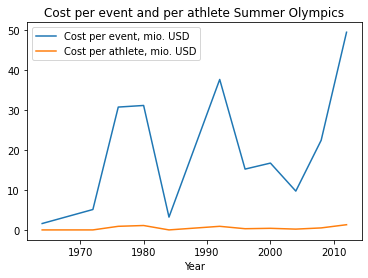

In [19]:
df.head(11).plot(x="Year", y=["Cost per event, mio. USD", "Cost per athlete, mio. USD"])
plt.title('Cost per event and per athlete Summer Olympics')

Action: Plotting the column "Cost Per event" and "Cost per Athlete" for previous Winter Olympics
Result: I will be able to compare the data side by side and look for trends in the temporal analysis.
I think what is interesting here is the lack of fluctuation of Per event cost compared to the per athlete cost when compared with the graph above. Ultimately, what both graphs have in common is the rise in both per athlete and per event costs, with both per event costs rising astronomically after 2010.

Text(0.5, 1.0, 'Cost per event and per athlete Summer Olympics')

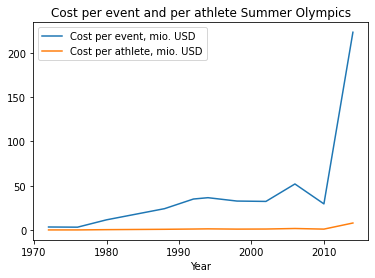

In [20]:
df.tail(11).plot(x="Year", y=["Cost per event, mio. USD","Cost per athlete, mio. USD"])
plt.title('Cost per event and per athlete Winter Olympics')

### Mapping the Data
Action: Import pycountry
Result: This will help me generate country codes based on country name (because my dataset lacks lattitude or longitude)- which I will be able to use to graph my results on a map.

In [21]:
import pycountry 

Action: Creating a new column for accept the 3 letter country codes for my countries
Result: By creating a new column, I can import the 3 letter alpha county codes that will allow me to map my data.


In [22]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

Action: Calling the new column "CODE" and looking at the top 10 entries of our data
Result: I am checking to make sure that the country code went through and is assigned so that I can continue with mapping the data.

In [23]:
df['CODE']=alpha3code(df.Country)
df.head(23)


,Games,Year,Country,Type,"Cost per event, mio. USD","Cost per athlete, mio. USD",CODE
0,Tokyo,1964,Japan,Summer,1.7,0.10,JPN
1,Munich,1972,Germany,Summer,5.2,0.10,DEU
2,Montreal,1976,Canada,Summer,30.8,1.00,CAN
3,Moscow,1980,Soviet Union,Summer,31.2,1.20,None
4,Los Angeles,1984,United States,Summer,3.3,0.10,USA
5,Barcelona,1992,Spain,Summer,37.7,1.00,ESP
6,Atlanta,1996,United States,Summer,15.3,0.40,USA
7,Sydney,2000,Australia,Summer,16.8,0.50,AUS
8,Athens,2004,Greece,Summer,9.8,0.30,GRC
9,Beijing,2008,China,Summer,22.5,0.60,CHN


Action: Merging geopandas data with our own dataset, and then using geopandas 'naturalearth_lowres' have a base for our data.
Result: By using geopandas, it will allow us to spatially analyze our data that other packages like pandas or numpy could not do. W are also renaming columns so that the data will be compatible to be merged together

In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

Action: Merging the data together and with the CODE file, and then finally with the location data from geopandas. We will be using information from a fellow users github space so that we can read the csv data there that has the latitude and longitude data.
Result: This will give us our desired latitude and longitude for our contries. We also are defining our value to be "Cost per event" so that it will show up on the map.

In [25]:
 merge=pd.merge(world,df,on='CODE')
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='Cost per event, mio. USD', ascending=False).reset_index()

Action:Plotting our merged data and putting in the appropriate data for our graph.
Result: We will be able to make publishable ready maps by giving our map a legend, title, and appropriate colorscheme. Also- now we can spatial see our data of cost per event on a global scale.

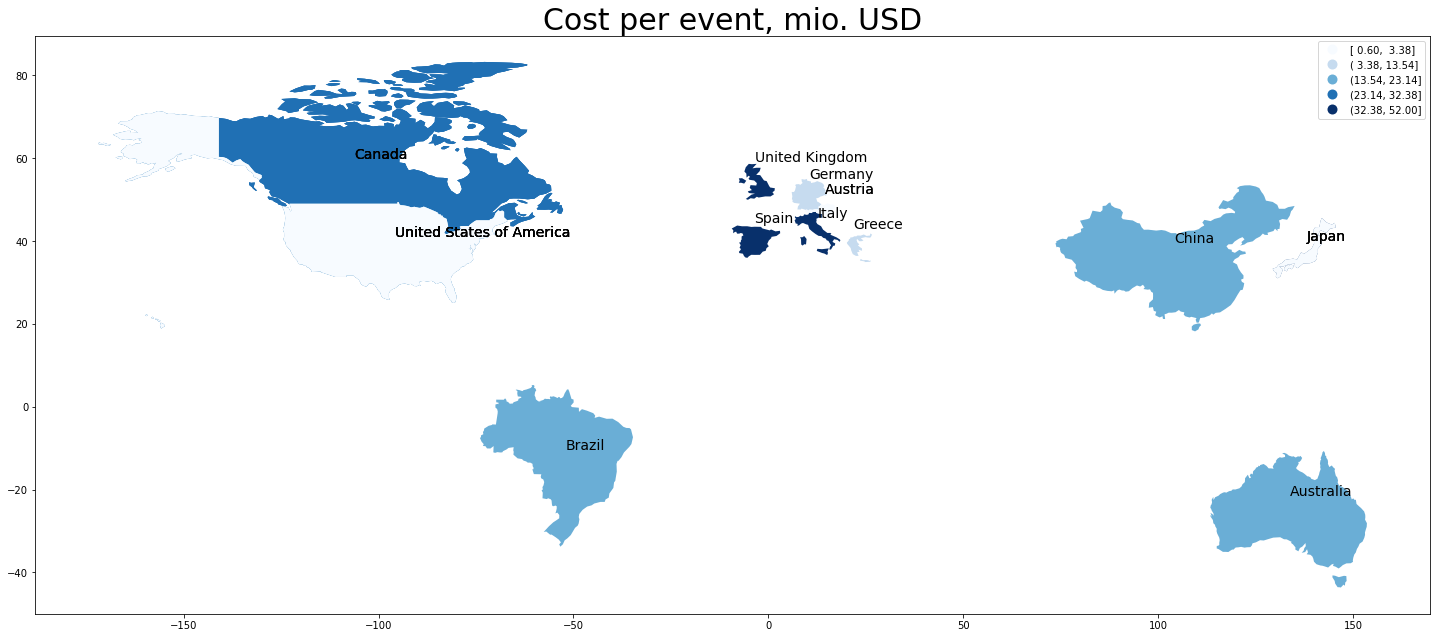

In [26]:

merge.plot(column='Cost per event, mio. USD', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Blues')
plt.title('Cost per event, mio. USD',fontsize=30)

for i in range(0,20):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n".format(merge.name[i]),size=14)
plt.show()

Action: Plotting our other map from the column "Cost per athlete"
Result: We will be able to make publishable ready maps by giving our map a legend, title, and appropriate colorscheme. Also- now we can think spatial and visualize the data "Cost per Athelete" 

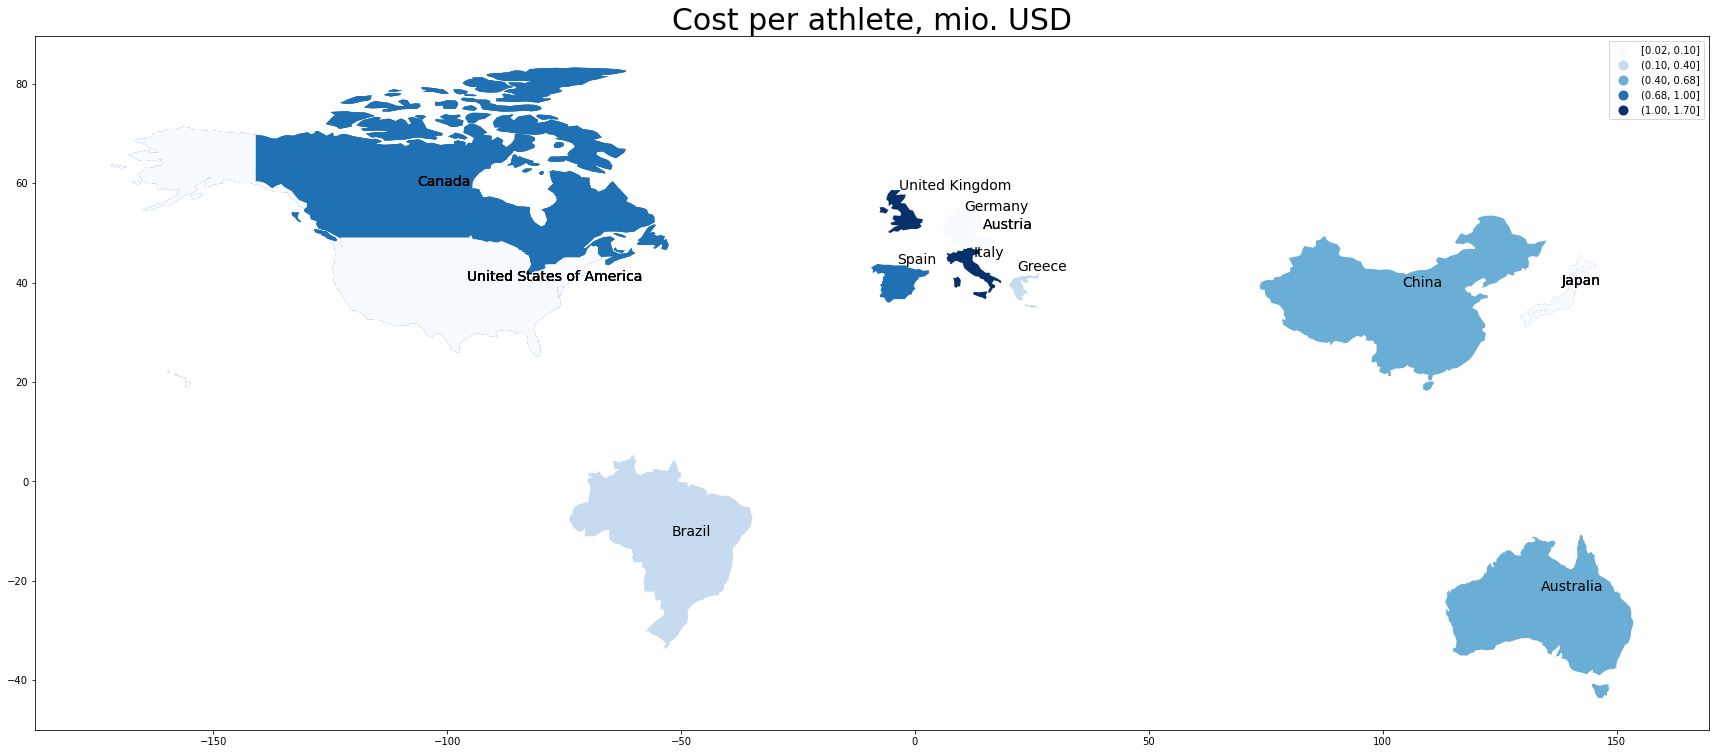

In [27]:
merge.plot(column='Cost per athlete, mio. USD', scheme="quantiles",
           figsize=(30, 25),
           legend=True,cmap='Blues')
plt.title('Cost per athlete, mio. USD',fontsize=30)

for i in range(0,20):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n".format(merge.name[i]),size=14)
plt.show()

Action: We are changing the variable and plotting what a world map of "Types of Olympic Games" looked like.
Result: We will be able to spatialy analzye this data. This may be interesting to compare with the previous graphs to make connections about types of games and their expenses.

/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


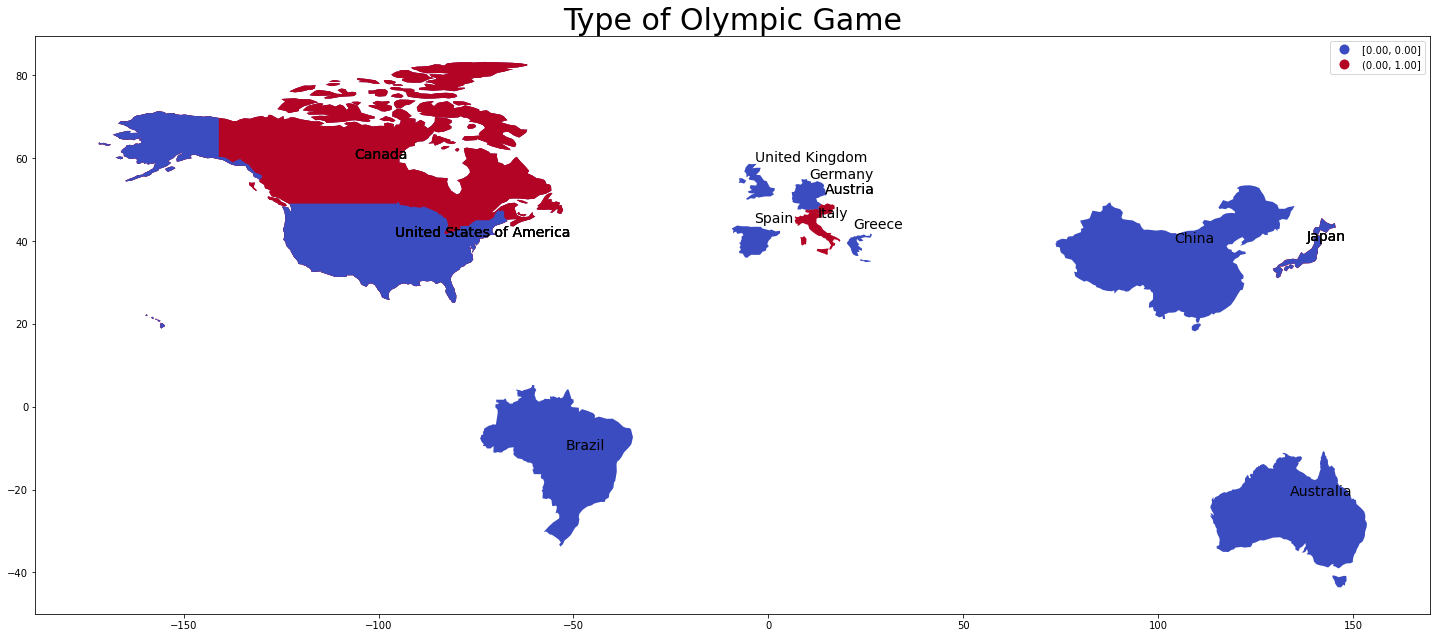

In [28]:

merge.plot(column='Type', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Type of Olympic Game',fontsize=30)

for i in range(0,20):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n".format(merge.name[i]),size=14)
plt.show()

Now that we've been able to visualize the data of 'Cost per event" and "Cost per athlete" and location of Olympic games,I want to quickly look at now which countries have had the most Olympic games.. I will be importing another data file because it goes back a little further than the previous file.
Action: Importing a new csv file and looking at the top 5 entries int he data
Result: We will have another dataset that we will be able to use data from. We are using head. in order to see the general entries into the data.

In [29]:
ot = pd.read_csv('Outturn.csv')

In [30]:
ot.head()

,Games,Year,Country,Type,Events,Athletes,"Cost, Billion USD"
0,Rome,1960,Italy,Summer,150,5338,NaN
1,Tokyo,1964,Japan,Summer,163,5152,0.282
2,Mexico City,1968,Mexico,Summer,172,5516,n/a**
3,Munich,1972,Germany,Summer,195,7234,1.009
4,Montreal,1976,Canada,Summer,198,6048,6.093


Action: Changing "Soviet Union" to "Russia"
Result Because the Winter Olympic games in 1980 were in Moscow, or present day Russia, and the former USSR is disolved, I am changing the name of the variable so that it cant be counted correctly together.

In [31]:
ot.head(5)
ot.replace('Soviet Union', 'Russia')

,Games,Year,Country,Type,Events,Athletes,"Cost, Billion USD"
0,Rome,1960,Italy,Summer,150,5338,NaN
1,Tokyo,1964,Japan,Summer,163,5152,0.282
2,Mexico City,1968,Mexico,Summer,172,5516,n/a**
3,Munich,1972,Germany,Summer,195,7234,1.009
4,Montreal,1976,Canada,Summer,198,6048,6.093
5,Moscow,1980,Russia,Summer,203,5179,6.331
6,Los Angeles,1984,United States,Summer,221,6829,0.719
7,Seoul,1988,South Korea,Summer,237,8397,NaN
8,Barcelona,1992,Spain,Summer,257,9356,9.687
9,Atlanta,1996,United States,Summer,271,10318,4.143


Action: Getting the value counts for "country"
Result: I can now see clearly how many times each country has hosted an Olympic game.

In [32]:
ot['Country'].value_counts()


United States     5
Canada            3
Japan             3
France            2
Austria           2
Italy             2
United Kingdom    1
China             1
Brazil            1
Yugoslavia        1
Mexico            1
South Korea       1
Norway            1
Spain             1
Australia         1
Russia            1
Germany           1
Soviet Union      1
Greece            1
Name: Country, dtype: int64

Action: renaming the value counts variable
Result: I will be able to use the newly named variable to plot seamlessly.

In [33]:
Host_Count = ot['Country'].value_counts()
Host_Count


United States     5
Canada            3
Japan             3
France            2
Austria           2
Italy             2
United Kingdom    1
China             1
Brazil            1
Yugoslavia        1
Mexico            1
South Korea       1
Norway            1
Spain             1
Australia         1
Russia            1
Germany           1
Soviet Union      1
Greece            1
Name: Country, dtype: int64

Action: Renaming the column names 
Result: This will help me have appropriately labeled X and Y axises when I plot my data shortly.

In [34]:
Host_Count = Host_Count.reset_index()
Host_Count

,index,Country
0,United States,5
1,Canada,3
2,Japan,3
3,France,2
4,Austria,2
5,Italy,2
6,United Kingdom,1
7,China,1
8,Brazil,1
9,Yugoslavia,1


In [35]:
Host_Count.columns.to_list()

['index', 'Country']

In [36]:
Host_Count.columns = ['Country', 'Count']
Host_Count

,Country,Count
0,United States,5
1,Canada,3
2,Japan,3
3,France,2
4,Austria,2
5,Italy,2
6,United Kingdom,1
7,China,1
8,Brazil,1
9,Yugoslavia,1


Action: PLotting my data
Result: Being able to visualize the data to better understand it.

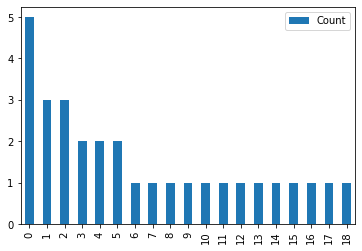

In [37]:
Host_Count.plot.bar()

Action:  Revaluating the data so that it is in descending format and with the proper numbers for each country.
Result: This will create a correctly labeled graph in descending order, which will be nicer to read.

In [38]:
top20 = ot["Country"].value_counts()
top20.sort_values(ascending=False)

United States     5
Canada            3
Japan             3
France            2
Austria           2
Italy             2
Brazil            1
United Kingdom    1
China             1
Greece            1
Soviet Union      1
Mexico            1
South Korea       1
Norway            1
Spain             1
Australia         1
Russia            1
Germany           1
Yugoslavia        1
Name: Country, dtype: int64

Action: Putting a title on our data and making sure it is clean and easy to read.
Result: Having easy tor ead and proffesional looking data will be ready to publish or use for projects.
It is imperative that data is easy to read, or else its purpose will be invalidated.

Text(0.5, 1.0, 'The Times Countries have Hosted The Olympics')

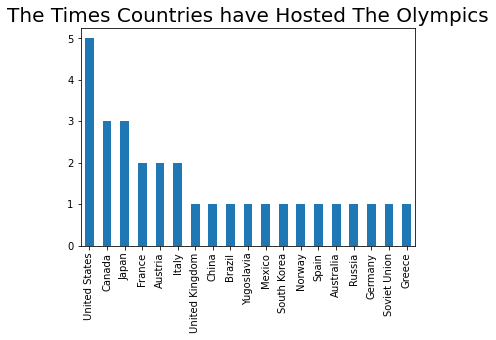

In [39]:
top20 = top20[:20]
top20.plot(kind="bar")
plt.title('The Times Countries have Hosted The Olympics',fontsize=20)

Final thoughts: Ultimately, I think it was really interesting to visualize the countries who payed the most per event and per athlete in addition to seeing that those prices are going up. This data will be useful later in helping us understand deeper the economic and social impacts of the Olympics on host countries. We can already see that the games cost and enormous amount, and that predominently "western" countries have hosted them (look at graph above). If from other datasources we know that less and less of these more developed countries are stopping trying to host the Olympics, this could mean grave news for the games down the road.